# Bài tập về nhà 4
### Môn: Linear Algebra

In [1]:
import numpy as np
from scipy import linalg
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Phương pháp khử Gauss - Jordan
def gauss_jordan(A):
    m,n = A.shape
    pivots=[]
    s=-1
    for j in range(n):
        col = A[:,j].copy()
        for i in pivots:
            col[i] = 0
        col = np.abs(col)
        pivot_arg = np.argmax(col)
        pivot = A[pivot_arg,j]
        if col[pivot_arg]!=0 and s<m-1:
            s+=1
            pivots.append(s)
            A[pivot_arg,:] = 1/pivot*A[pivot_arg,:]
            row_swap = A[s,:].copy()
            A[s,:] = A[pivot_arg,:]
            A[pivot_arg,:] = row_swap
            for i in range(m):
                if i!=s:
                    A[i,:] -= A[i,j]*A[s,:]

### Bài tập 1
Cho dữ liệu về lưu lượng giao thông đo được tại một nút giao thông trong 24 giờ liên tiếp:

| $x$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
|---:|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
| $y$ |416|212|121|17|12|132|445|1412|1322|1121|925|823|

| $x$ |12|13|14|15|16| 17 | 18 | 19 | 20 | 21 | 22 | 23 |
|---:|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
| $y$ |721|772|913|1005|802|743|754|543|431|429|423|419|

Biến đổi của lưu lượng giao thông được mô tả bởi sự chồng chất 3 hàm Lorentz:

$$y=a_0+\dfrac{a_1}{b_1^2+(x-3.5)^2}+\dfrac{a_2}{b_2^2+(x-7.5)^2}+\dfrac{a_3}{b_3^2+(x-15.5)^2}$$

* Trường hợp cố định các tham số $b_1=b_2=2,\,b_3=3$: Mô hình lưu lượng giao thông là tuyến tính. Sử dụng kĩ thuật hồi quy tuyến tính để xác định các tham số còn lại của mô hình.
* Mô hình lưu lượng giao thông dạng đầy đủ thực chất là mô hình phi tuyến. Sử dụng hàm **curve_fit** trong **scipy.optimize** để xác định các tham số của mô hình phù hợp với dữ liệu.

In [8]:
# Dữ liệu
xdata = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ydata = np.array([416,212,121,17,12,132,445,1412,1322,1121,925,823,721,772,913,1005,802,743,754,543,431,429,423,419])

[  357.50546474 -2827.37411211  4247.30397482  4725.47826184]


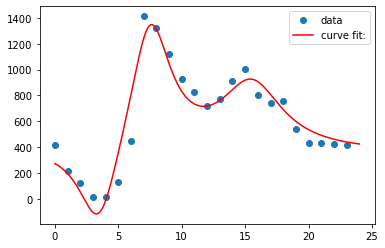

In [9]:
# Trường hợp tuyến tính
f1 = lambda x: 1/(4+(x-3.5)**2)
f2 = lambda x: 1/(4+(x-7.5)**2)
f3 = lambda x: 1/(9+(x-15.5)**2)

X = np.vstack([np.ones(xdata.size),f1(xdata),f2(xdata),f3(xdata)]).T
a_coef = np.linalg.lstsq(X,ydata,rcond=None)[0]
print(a_coef)
y_reg = lambda x: a_coef[0]+a_coef[1]*f1(x)+a_coef[2]*f2(x)+a_coef[3]*f3(x)

x_ = np.linspace(0, 24, 500)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x_,y_reg(x_),'r', label='curve fit:')
plt.legend()
plt.show()

[ 3.91847979e+02 -3.39455031e+03  2.30324004e+00  2.79717138e+03
  1.55583246e+00  4.83245949e+03  3.06794230e+00]


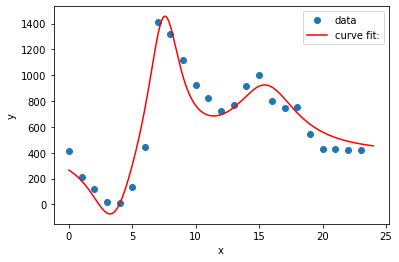

In [10]:
# Trường hợp phi tuyến
def func(x,y0,a1,b1,a2,b2,a3,b3):
    return y0+a1/(b1**2+(x-3.5)**2)+a2/(b2**2+(x-7.5)**2)+a3/(b3**2+(x-15.5)**2)

g=[a_coef[0],a_coef[1],2,a_coef[2],2,a_coef[3],3]

x = np.linspace(0, 24, 500)
n=len(x)
y=np.empty(n)
for i in range(n):
    y[i]=func(x[i],*g)

popt, pcov = curve_fit(func, xdata, ydata,g)
print(popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x, func(x,*popt), 'r-',
         label='curve fit:')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Bài tập 2
Sử dụng dữ liệu trong file *sample.csv* để xác định các tham số của mô hình hồi quy dưới dạng sau đây:

$$y=\dfrac{1}{a+b.\exp({-c\,x})}$$

Tải dữ liệu từ file vào mảng sử dụng thư viện pandas

[1.55039226 0.65056517 0.24095074]


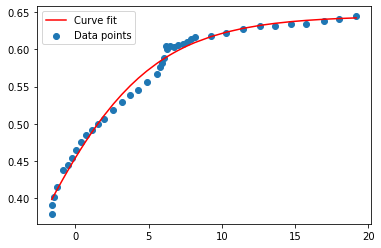

In [11]:
import pandas as pd
data=pd.read_csv("sample.csv")
x=data["x"].values
y=data["y"].values

def func(x,a,b,c):
    return 1/(a+b*np.exp(-c*x))

popt, pcov = curve_fit(func, x, y)
print(popt)
plt.scatter(x,y,label="Data points")
plt.plot(x,func(x,*popt),'r',label="Curve fit")
plt.legend()
plt.show()